In [6]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Carica i dati di una gara passata
session = fastf1.get_session(2023, 'Monza', 'R')
session.load()

# Estrai i dati dei pitstop
pitstops = session.get_pitstops(include_inlaps=True, include_outlaps=True)

# Analizza i tempi di pitstop
pitstops['Duration'] = pitstops['Time'] - pitstops['PitInTime']
print(pitstops.groupby('Driver')['Duration'].mean())

# Visualizza i tempi di pitstop
plt.figure(figsize=(10, 6))
plt.bar(pitstops['Driver'], pitstops['Duration'])
plt.title('Tempi di Pitstop per Pilota')
plt.xlabel('Pilota')
plt.ylabel('Durata (s)')
plt.show()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


AttributeError: 'Session' object has no attribute 'get_pitstops'

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
c:\Users\calin\OneDrive\Desktop\Develhope\Ex\FASTF1\.venv\lib

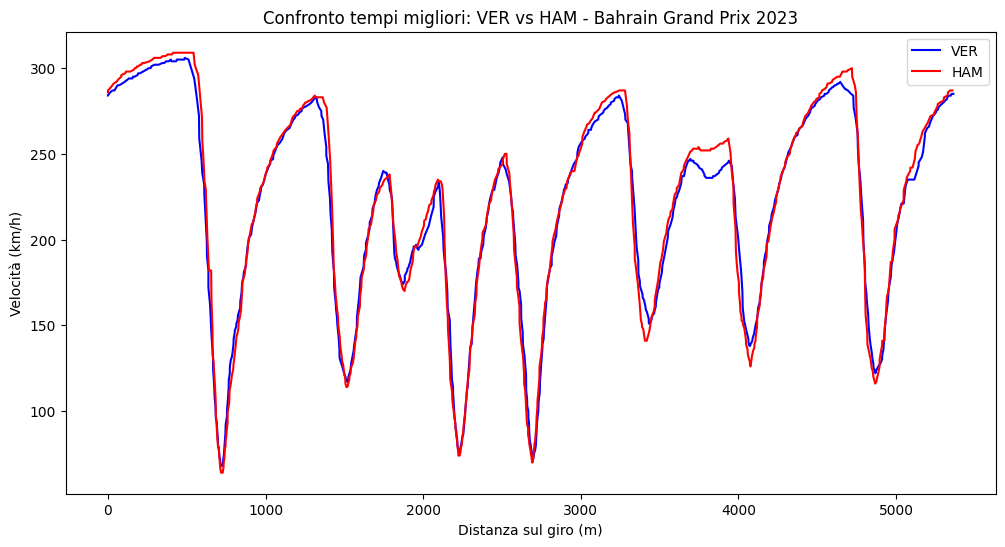

In [8]:


# Carica la sessione (esempio: Gran Premio del Bahrain 2023, Gara)
session = fastf1.get_session(2023, 'Bahrain', 'R')
session.load()

# Seleziona i due piloti da confrontare
driver1 = 'VER'  # Verstappen
driver2 = 'HAM'  # Hamilton

# Trova i tempi migliori (miglior giro) per ciascun pilota
best_lap_driver1 = session.laps.pick_driver(driver1).pick_fastest()
best_lap_driver2 = session.laps.pick_driver(driver2).pick_fastest()

# Carica i dati di telemetria per i migliori giri
telemetry_driver1 = best_lap_driver1.get_telemetry()
telemetry_driver2 = best_lap_driver2.get_telemetry()

# Crea il grafico
fig, ax = plt.subplots(figsize=(12, 6))

# Plot dei tempi sul giro per i due piloti
ax.plot(telemetry_driver1['Distance'], telemetry_driver1['Speed'], label=driver1, color='blue')
ax.plot(telemetry_driver2['Distance'], telemetry_driver2['Speed'], label=driver2, color='red')

# Aggiungi titoli e legenda
ax.set_title(f'Confronto tempi migliori: {driver1} vs {driver2} - {session.event["EventName"]} {session.event.year}')
ax.set_xlabel('Distanza sul giro (m)')
ax.set_ylabel('Velocità (km/h)')
ax.legend()

# Mostra il grafico
plt.show()

In [ ]:
print(telemetry_driver1.columns)

Index(['Date', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Time', 'SessionTime'],
      dtype='object')
